<a href="https://colab.research.google.com/github/atiampa/YoloV5-RoboFlow-MachineLearning/blob/main/2024_YOLOv5_Inference_Facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Step 1: Install Requirements

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
%pip install -q roboflow

import torch
import utils
import os
import glob

display = utils.notebook_init()  # checks

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.68 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/content/yolov5/yolov5


# Step 2: Download Test Dataset from Roboflow

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6EAYj6I1uXPyYPChkirs")
project = rf.workspace("iote-7emb7").project("face-mask-7gltm")
version = project.version(1)
dataset = version.download("yolov5")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/face-mask-1 in yolov5pytorch:: 100%|██████████| 1688/1688 [00:00<00:00, 7205.77it/s]


# Step 3: Download model from local system

In [ ]:
%cd ..
from google.colab import files
uploaded = files.upload()
%cd yolov5

/content


Saving best.pt to best.pt
/content/yolov5


# Step 3: Inference on test dataset

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
path_image = glob.glob('../datasets/**/test/images/')[0] + '*'

In [ ]:
!python detect.py --weights '../best.pt' --img 416 --conf 0.5 --source=$path_image

detect: weights=['../best.pt'], source=../datasets/face-mask-1/test/images/*, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/82 /content/datasets/face-mask-1/test/images/maksssksksss113_png.rf.70bbd37145aa2cc55f56ea4d209dda39.jpg: 416x416 3 with_masks, 5.7ms
image 2/82 /content/datasets/face-mask-1/test/images/maksssksksss128_png.rf.441d6daf2eacbd122e3f67b65c97cf9c.jpg: 416x416 1 without_ma

#Step 4: Visualize

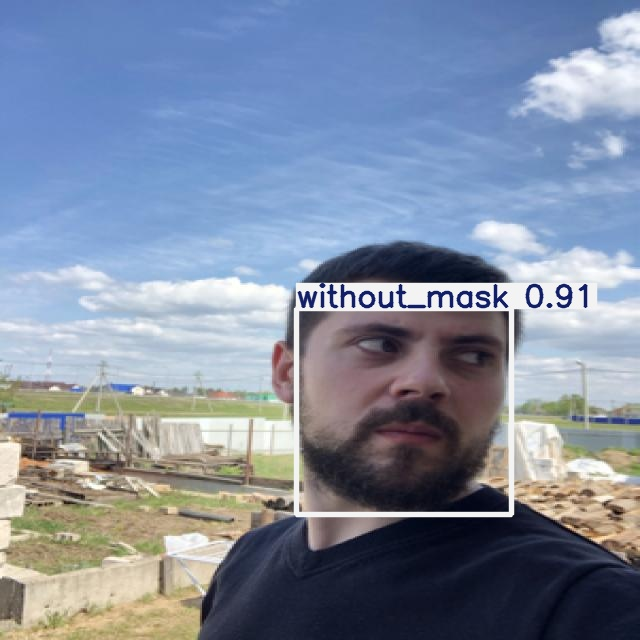

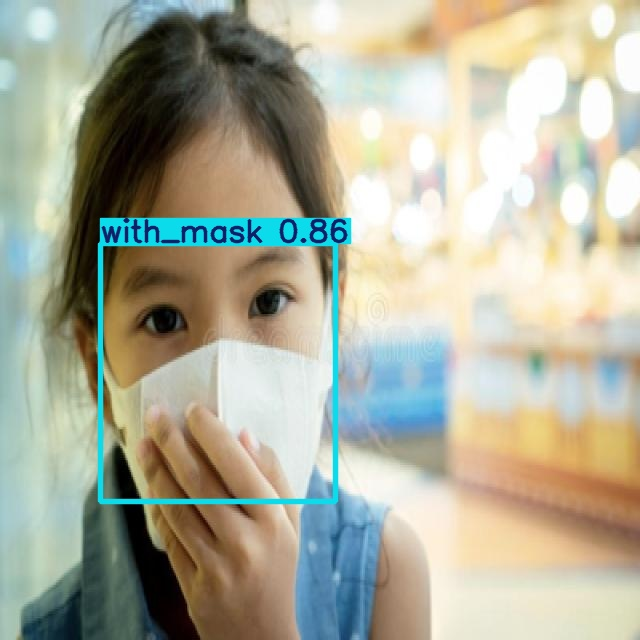

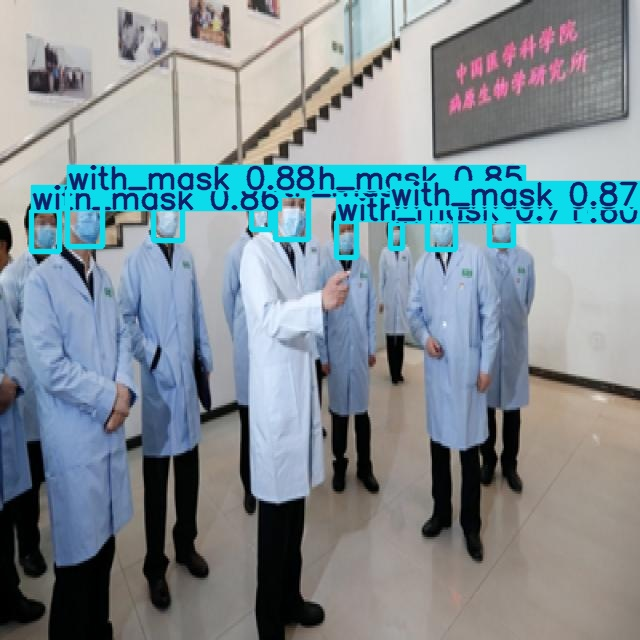

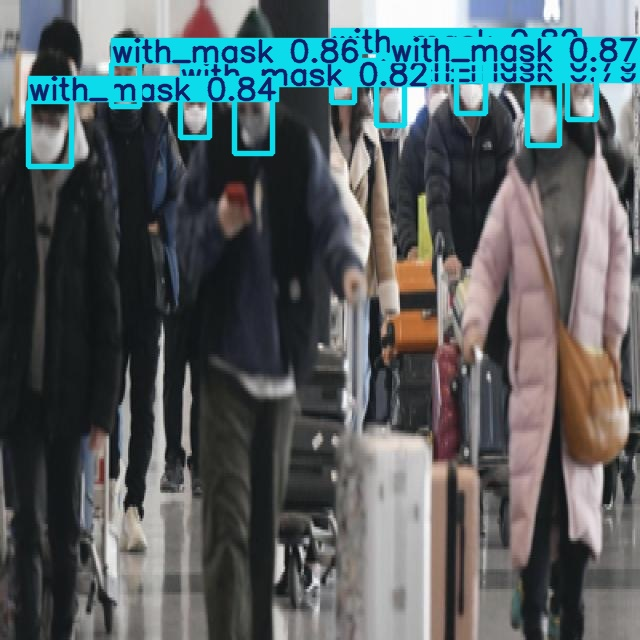

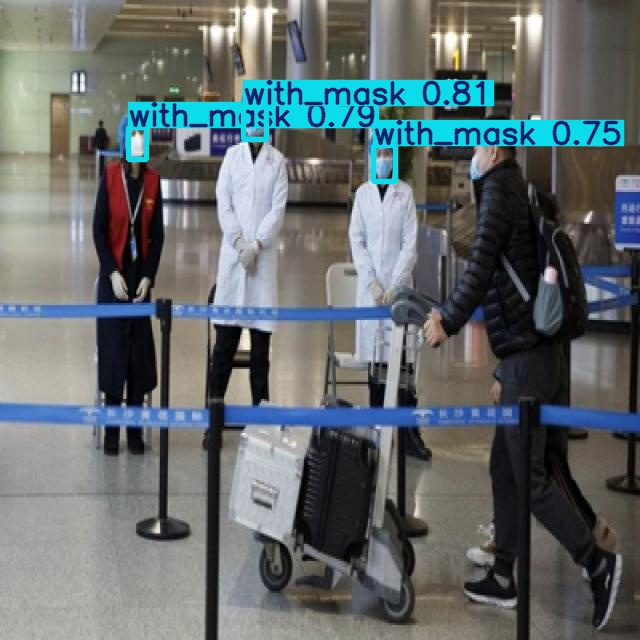

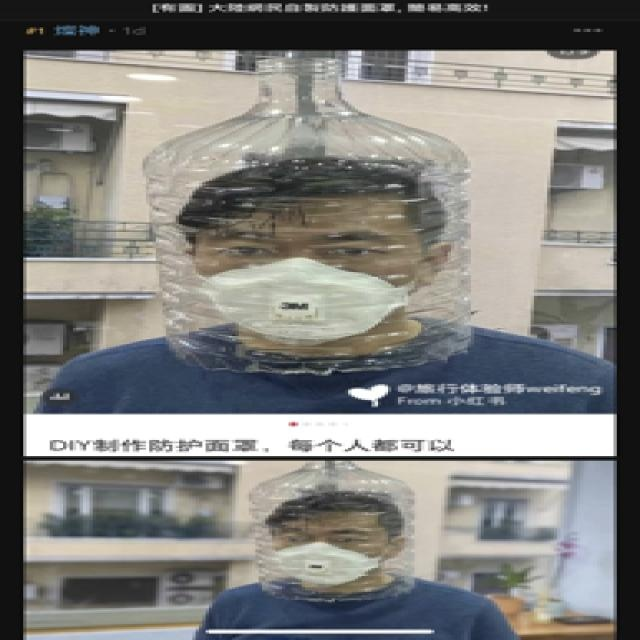

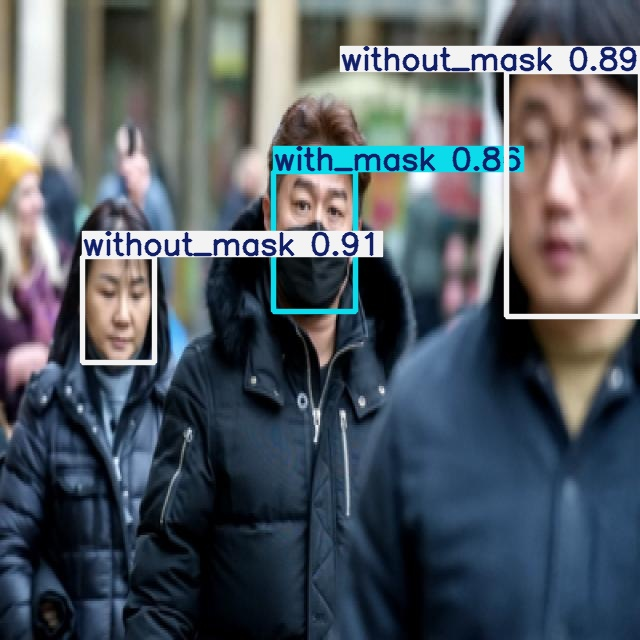

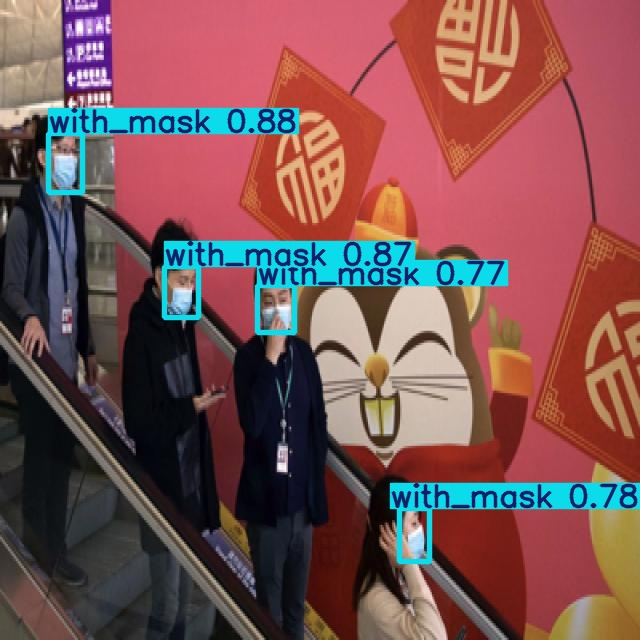

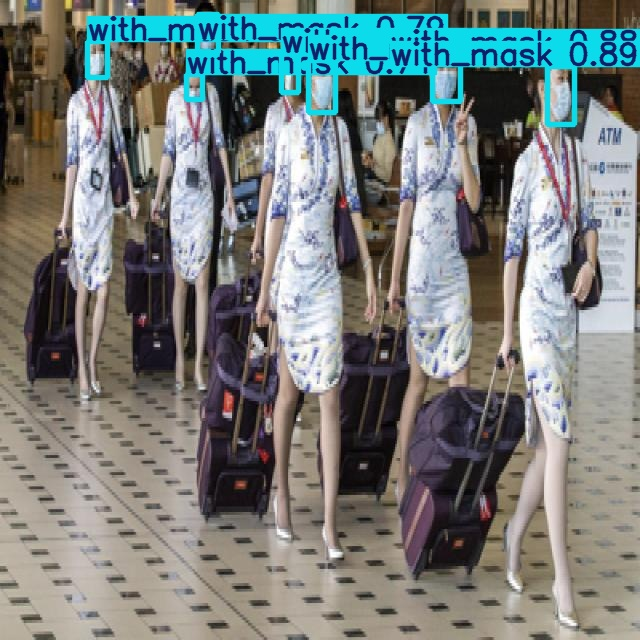

In [ ]:
from IPython.display import display, Image
import glob
for file in glob.glob('/content/yolov5/runs/detect/exp/*')[11:20]:
  display(Image(file))